In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import  cv2


import shutil
from PIL import Image

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/microsoft-catsvsdogs-dataset


In [ ]:
os.listdir(target_path)

['PetImages', 'MSR-LA - 3467.docx', 'readme[1].txt', 'Cat']

In [ ]:
path='/kaggle/input/microsoft-catsvsdogs-dataset/PetImages'

In [ ]:


# Define the path for the dataset
path = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages'

# Define the target path for the working directory
target_path = '/kaggle/working/PetImages'

# Copy dataset and reshape images
for category in ['Cat', 'Dog']:
    source_folder = os.path.join(path, category)
    target_folder = os.path.join(target_path, category)

    # Create the target folder if it doesn't exist
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    for filename in os.listdir(source_folder):
        file_path = os.path.join(source_folder, filename)
        target_file_path = os.path.join(target_folder, filename)

        try:
            # Open the image, convert to grayscale, resize and save to target folder
            with Image.open(file_path) as img:
                img = img.convert("L")  # Convert to grayscale
                img = img.resize((256, 256))  # Resize image to 256x256
                img.save(target_file_path)  # Save the reshaped image
        except:
            print(f"Error processing file: {filename}")
            continue

# After reshaping, now you can proceed with other tasks (e.g., training)
print("Images reshaped and copied successfully.")

Error processing file: Thumbs.db
Error processing file: 666.jpg


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Error processing file: 11702.jpg
Error processing file: Thumbs.db
Images reshaped and copied successfully.


In [ ]:
class_names = os.listdir(path)
class_names

['Dog', 'Cat']

In [ ]:
!pip install tensorflow


(128, 128, 1)


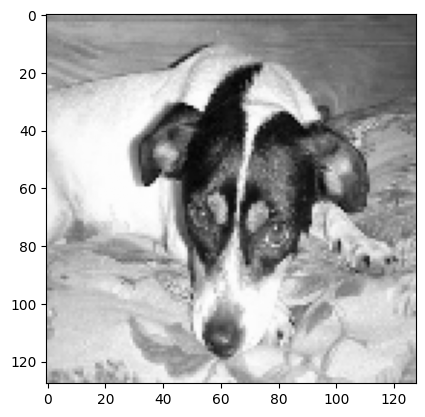

(128, 128, 1)


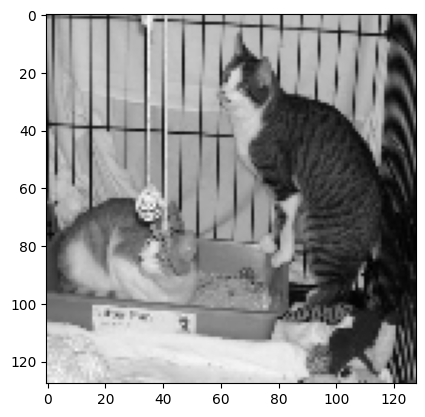

In [ ]:
for sample in class_names:
  for img in os.listdir(os.path.join(path,sample)):
    img=cv2.imread(os.path.join(path,sample,img))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(128,128))
    img=img.reshape(128,128,1)
    # print(os.path.join(path,sample,img))
    # print(img)
    img = img.astype('float32') / 255.0
    print(img.shape)
    plt.imshow(img,cmap='gray')
    plt.show()
    break

 ## Making a dataframe with img_path and Labels

In [ ]:
data=[]
for folder in class_names:
  for img in os.listdir(os.path.join(path,folder)):
    img_object={}
    img_object['path']=os.path.join(path,folder,img)
    img_object['label']=folder
    data.append(img_object)

data=pd.DataFrame(data)
data.head()

,path,label
0,/kaggle/input/microsoft-catsvsdogs-dataset/Pet...,Dog
1,/kaggle/input/microsoft-catsvsdogs-dataset/Pet...,Dog
2,/kaggle/input/microsoft-catsvsdogs-dataset/Pet...,Dog
3,/kaggle/input/microsoft-catsvsdogs-dataset/Pet...,Dog
4,/kaggle/input/microsoft-catsvsdogs-dataset/Pet...,Dog


In [ ]:
data.shape

(25002, 2)

In [ ]:
data.tail()

,path,label
24997,/kaggle/input/microsoft-catsvsdogs-dataset/Pet...,Cat
24998,/kaggle/input/microsoft-catsvsdogs-dataset/Pet...,Cat
24999,/kaggle/input/microsoft-catsvsdogs-dataset/Pet...,Cat
25000,/kaggle/input/microsoft-catsvsdogs-dataset/Pet...,Cat
25001,/kaggle/input/microsoft-catsvsdogs-dataset/Pet...,Cat


# Img Preprocess

## make all imgs (256,256,1) as gray scale

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

img_size=(128,128)
batch_size=128

train_st = image_dataset_from_directory(
    target_path,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    label_mode='binary'  # Binary labels (for binary classification: cat vs dog)
)

val_st = image_dataset_from_directory(
    target_path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    label_mode='binary'
)



Found 24998 files belonging to 2 classes.
Using 19999 files for training.
Found 24998 files belonging to 2 classes.
Using 4999 files for validation.


# Model Training

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             

 Total params: 2,720,641 (10.38 MB)

 Trainable params: 2,718,145 (10.37 MB)

 Non-trainable params: 2,496 (9.75 KB)

## Define the EarlyStopping callback


In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [ ]:
# Check the shape of images in the training dataset
for images, labels in train_st.take(1):  # Only take one batch to check
    print(f"Training Images Shape: {images.shape}")
    print(f"Training Labels Shape: {labels.shape}")

# Check the shape of images in the validation dataset
for images, labels in val_st.take(1):  # Only take one batch to check
    print(f"Validation Images Shape: {images.shape}")
    print(f"Validation Labels Shape: {labels.shape}")


Training Images Shape: (128, 128, 128, 1)
Training Labels Shape: (128, 1)
Validation Images Shape: (128, 128, 128, 1)
Validation Labels Shape: (128, 1)


## Train the model


In [ ]:
history = model.fit(
    train_st,
    validation_data=val_st,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 45s 163ms/step - accuracy: 0.5711 - loss: 0.8933 - val_accuracy: 0.4957 - val_loss: 0.8231
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.7042 - loss: 0.5801 - val_accuracy: 0.6357 - val_loss: 0.6258
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.7892 - loss: 0.4524 - val_accuracy: 0.8256 - val_loss: 0.4062
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.8484 - loss: 0.3562 - val_accuracy: 0.8246 - val_loss: 0.4202
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.8908 - loss: 0.2589 - val_accuracy: 0.8584 - val_loss: 0.3131
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9199 - loss: 0.2052 - val_accuracy: 0.7213 - val_loss: 0.5635
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9311 - loss: 0.1705 - val_accuracy: 0.8676 - val_loss: 0.3032
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.9499 - loss: 0.1291 -

In [ ]:
model.save('model_v0.h5')

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             

 Total params: 2,720,641 (10.38 MB)

 Trainable params: 2,718,145 (10.37 MB)

 Non-trainable params: 2,496 (9.75 KB)

In [ ]:
history = model.fit(
    train_st,
    validation_data=val_st,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 157ms/step - accuracy: 0.5406 - loss: 1.0123 - val_accuracy: 0.6037 - val_loss: 0.6972
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.6244 - loss: 0.6492 - val_accuracy: 0.6559 - val_loss: 0.6085
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.7281 - loss: 0.5490 - val_accuracy: 0.7564 - val_loss: 0.5335
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.7959 - loss: 0.4504 - val_accuracy: 0.8028 - val_loss: 0.4554
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.8402 - loss: 0.3776 - val_accuracy: 0.7886 - val_loss: 0.4600
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.8776 - loss: 0.2981 - val_accuracy: 0.8316 - val_loss: 0.3884
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9009 - loss: 0.2490 - val_accuracy: 0.7650 - val_loss: 0.5023
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9166 - loss: 0.2143 -

In [ ]:
model.save('model_v1.h5')

In [ ]:

img_size=(128,128)
batch_size=64

train_st = image_dataset_from_directory(
    target_path,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    label_mode='binary'  # Binary labels (for binary classification: cat vs dog)
)

val_st = image_dataset_from_directory(
    target_path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    label_mode='binary'
)


Found 24998 files belonging to 2 classes.
Using 19999 files for training.
Found 24998 files belonging to 2 classes.
Using 4999 files for validation.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_47 (Conv2D)              │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             

 Total params: 2,720,641 (10.38 MB)

 Trainable params: 2,718,145 (10.37 MB)

 Non-trainable params: 2,496 (9.75 KB)

In [ ]:
history = model.fit(
    train_st,
    validation_data=val_st,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 82ms/step - accuracy: 0.5556 - loss: 0.9927 - val_accuracy: 0.4915 - val_loss: 0.8401
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.6776 - loss: 0.5994 - val_accuracy: 0.6483 - val_loss: 0.6053
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.7732 - loss: 0.4823 - val_accuracy: 0.7578 - val_loss: 0.4813
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.8515 - loss: 0.3508 - val_accuracy: 0.8458 - val_loss: 0.3750
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8935 - loss: 0.2648 - val_accuracy: 0.8666 - val_loss: 0.2915
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.9159 - loss: 0.2082 - val_accuracy: 0.8122 - val_loss: 0.4059
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.9340 - loss: 0.1717 - val_accuracy: 0.7976 - val_loss: 0.3899
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.9416 - loss: 0.1500 - 

In [ ]:
model.save('model_v2.h5')
